In [89]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error

In [90]:
boston=load_boston()
X = boston.data
Y = boston.target


In [91]:
X=pd.DataFrame(X)
Y=pd.DataFrame(Y)



In [92]:
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

In [93]:
clf = SGDRegressor()
clf.fit(X, Y)
print(mean_squared_error(Y, clf.predict(X)))

22.682054919135837


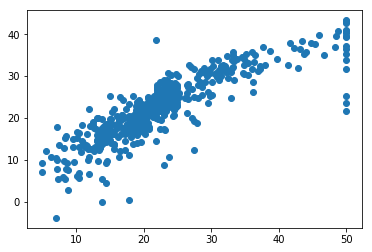

In [94]:
%matplotlib inline
plt.scatter(Y,clf.predict(X))


## Implementing sgd for linearRegression 

In [96]:
#https://stackoverflow.com/questions/48843721/python-gd-and-sgd-implementation-on-linear-regression citation link and used for reference
import random
def implem_sgd(X,Y, lr_rate,  n_iter):
    w_updated=np.ones(shape=(1,13))*-100
    b_updated=-100
    t=range(n_iter)
    r=lr_rate
    #converting to DataFrames
    X=pd.DataFrame(X)
    Y=pd.DataFrame(Y)
    for i in t:
        import random
        ran=random.sample(range(506),10)
        w_before=w_updated
        b_before=b_updated
        w_iter=np.zeros(shape=(1,13))
        b_iter=0
        #taking 10 random samples at each iteration
        x_data=X.iloc[ran,:]
        y_data=Y.iloc[ran,:]
        x=np.array(x_data)
        y=np.array(y_data)
        # for getting the derivatives using sgd with k=10
        for i in range(10):  
            y_curr=np.dot(w_before,x[i])+b_before
            w_iter+=x[i] * (y[i] - y_curr)
            b_iter+=(y[i]-y_curr)  
        # multiplying the costant -2/N in summation 
        w_iter*=(-2/x.shape[0])
        b_iter*=(-2/x.shape[0])
        #updating the parameters
        w_updated=(w_before-r*w_iter)
        b_updated=(b_before-r*b_iter)
    return w_updated, b_updated

In [97]:
w, b=implem_sgd(X,Y, lr_rate=0.1,  n_iter=1000)

In [98]:
def pred(x,w, b):
    y_pred=[]
    for i in range(len(x)):
        y=np.asscalar(np.dot(w,x[i:i+1].T)+b)
        y_pred.append(y)
    return np.array(y_pred)


In [99]:
y_pred=pred(X, w=w, b=b)

### plot btw actualy and predicted y through implemented sgd

****************************************
error  :  26.78721988491362


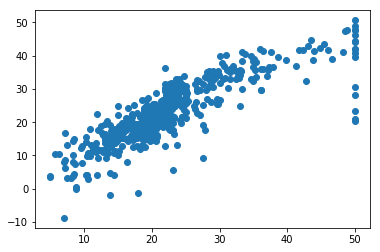

In [101]:
plt.scatter(Y,y_pred)
print('*'*40)
print("error  : ",mean_squared_error(Y,y_pred))

****************************************
error  :  22.682054919135837


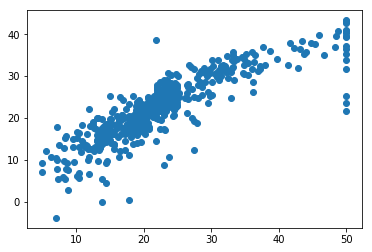

In [102]:
plt.scatter(Y,clf.predict(X))
print('*'*40)
print("error  : ",mean_squared_error(Y,clf.predict(X)))

## printing the weight vectors of sklearn sgd and manually implemented sgd weights

In [103]:
print('sklearn_sgd_weights---\n',clf.coef_)
print('-'*80)
print('manual_sgd_weights---\n',w)

sklearn_sgd_weights---
 [-0.68649938  0.56688948 -0.26751374  0.79235232 -1.1254483   3.03396308
 -0.04417273 -2.12359496  0.97442429 -0.55299856 -1.85541709  0.86030389
 -3.51132304]
--------------------------------------------------------------------------------
manual_sgd_weights---
 [[-1.42028182  1.21913297  0.2102615  -0.11618795 -2.0692767   3.63280457
  -0.17357159 -3.58623358  2.26230523 -2.49545941 -3.11946095  0.99535596
  -3.20796578]]


## checking how much the weight vector weights has been changed

In [104]:
percent=abs((clf.coef_-w)/w)*100
count=0
for i in range(13):
    if (percent[0][i]>50):
        count+=1
print('how many no.of points which are more than 50% change=',count)

how many no.of points which are more than 50% change= 7


## printing the intercept b of both sklearn sgd and implemented sgd intercept

In [106]:
print('sklearn sgd intercept=',clf.intercept_)
print('-'*80)
print('manual sgd intercept=',b)
print('-'*80)
print('error in the intercept ',abs(clf.intercept_-b))

sklearn sgd intercept= [22.3493427]
--------------------------------------------------------------------------------
manual sgd intercept= [23.15094725]
--------------------------------------------------------------------------------
error in the intercept  [0.80160456]
